In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns

- explore whether there are any dependences between reading/writing/math_scores
- find out whether student's race or/and parents' level_of_education influences lunch_type of their children
- attach all proving plots

In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [3]:
data.columns = [x.replace(" ", "_") for x in data.columns]
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Checking for normality

In [4]:
score = [i for i in list(data) if "score" in i]

### Histograms

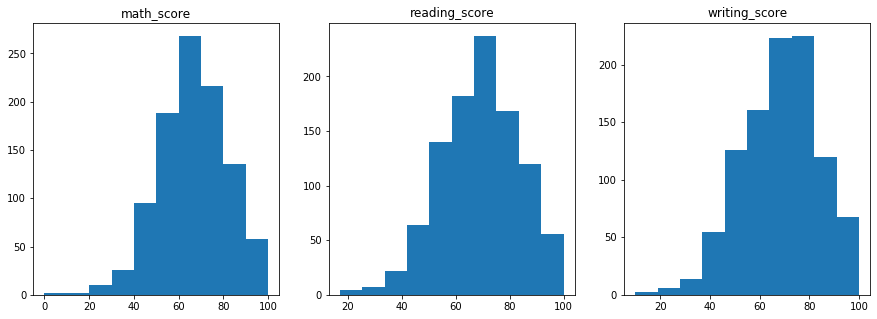

In [5]:
fig = plt.figure(figsize=(15,5))
for i in range(3):
    fig.add_subplot(1, 3, i+1)
    plt.hist(data[score[i]])
    plt.title(score[i])
plt.show()

### QQ plots

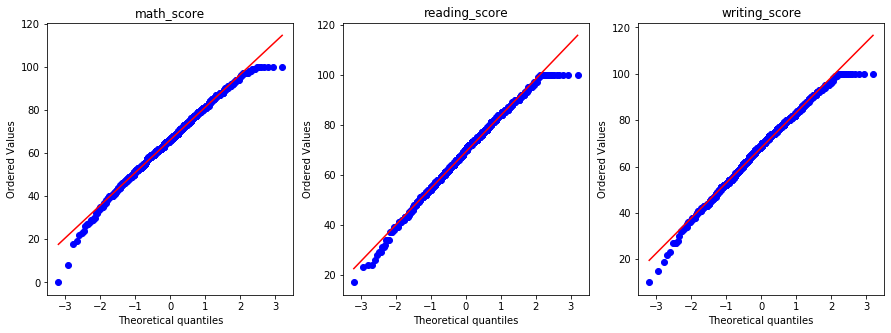

In [6]:
fig = plt.figure(figsize=(15,5))
for i in range(3):
    fig.add_subplot(1, 3, i+1)
    stats.probplot(data[score[i]], plot=plt)
    plt.title(score[i])
plt.show()

### Checking for normality using Shapiro-Wilk test

In [7]:
pd.DataFrame([scipy.stats.shapiro(data[score[i]]) for i in range(3)], columns = ['Statistics', 'p-value'], index = score)

,Statistics,p-value
math_score,0.993151,0.000145
reading_score,0.992921,0.000106
writing_score,0.991963,0.000029


The test says the data is not normalily distributed. I'll use Spearman Correlation.

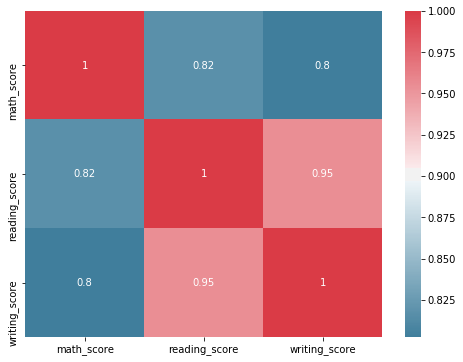

In [8]:
corr = data[score].corr()

f, ax = plt.subplots(figsize =(8, 6)) 
sns.heatmap(corr, cmap = sns.diverging_palette(230, 10, as_cmap=True), annot=True)

Looks like there is a positive correlation between the 3 variables. The strongest correlation is between reading and writing scores. 

## 2.a Checking whether parents' level_of_education influences lunch_type.

In [9]:
edu_lunch = pd.crosstab(data['parental_level_of_education'], data['lunch'] )
edu_lunch

lunch,free/reduced,standard
parental_level_of_education,,
associate's degree,77,145
bachelor's degree,44,74
high school,70,126
master's degree,24,35
some college,79,147
some high school,61,118


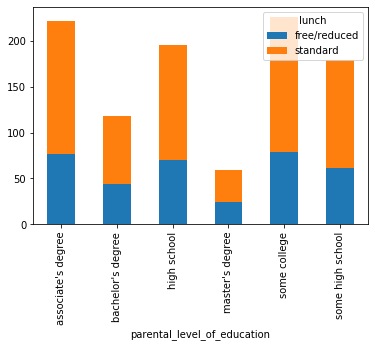

In [10]:
edu_lunch.plot(kind='bar', stacked=True)

In [11]:
stat, p, dof, expected = scipy.stats.chi2_contingency(edu_lunch)
print('p-value =', p)
if p <= 0.05:
    print('Dependent!')
else:
    print('Independent!')

p-value = 0.9531014927218224
Independent!


## 2.b Checking whether student's race influences lunch_type.

In [12]:
race_lunch = pd.crosstab(data['race/ethnicity'], data['lunch'] )
race_lunch

lunch,free/reduced,standard
race/ethnicity,,
group A,36,53
group B,69,121
group C,114,205
group D,95,167
group E,41,99


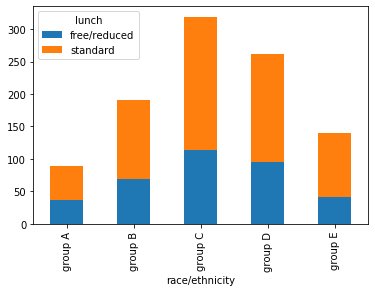

In [13]:
race_lunch.plot(kind='bar', stacked=True)

In [14]:
stat, p, dof, expected = scipy.stats.chi2_contingency(race_lunch)
print('p-value =', p)
if p <= 0.05:
    print('Dependent!')
else:
    print('Independent!')

p-value = 0.48669808284196503
Independent!


## 2.c Checking whether student's race and parents' level_of_education influences lunch_type.

In [15]:
edu_race_lunch = pd.crosstab(index = [data['parental_level_of_education'], data['race/ethnicity']], 
                             columns = data['lunch'] )
edu_race_lunch

lunch                                       free/reduced  standard
parental_level_of_education race/ethnicity                        
associate's degree          group A                    7         7
                            group B                   14        27
                            group C                   22        56
                            group D                   21        29
                            group E                   13        26
bachelor's degree           group A                    2        10
                            group B                    9        11
                            group C                   15        25
                            group D                   14        14
                            group E                    4        14
high school                 group A                    7        11
                            group B                   16        32
                            group C                   23        41
                            group D                   16        28
                            group E                    8        14
master's degree             group A                    2         1
                            group B                    4         2
                            group C                   10         9
                            group D                    5        18
                            group E                    3         5
some college                group A                    7        11
                            group B                   16        21
                            group C                   23        46
                            group D                   26        41
                            group E                    7        28
some high school            group A                   11        13
                            group B                   10        28
                            group C                   21        28
                            group D                   13        37
                            group E                    6        12

In [16]:
stat, p, dof, expected = scipy.stats.chi2_contingency(edu_race_lunch)
print('p-value =', p)
if p <= 0.05:
    print('Dependent!')
else:
    print('Independent!')

p-value = 0.41050056464171486
Independent!
